In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#SimpleRNN處理批次量的序列資料，需輸入3D向量，shape=(batch_size 批次量大小, timesteps 時間點數量, input_features 輸入特徵)
#可回傳 1.每個時間點的連續輸出的完整序列資料(3D張量，shape=(batch_size 批次量大小, timesteps 時間點數量, input_features 輸入特徵))
#      2.對每個輸入序列資料的最後一個輸出(2D張量，shape=(batch_size 批次量大小, input_features 輸入特徵))
#這兩種方式由參數return_sequences控制
from tensorflow import keras
from tensorflow.keras import models, layers

In [3]:
model = models.Sequential()
model.add(layers.Embedding(10000, 32))
model.add(layers.SimpleRNN(32)) #return_sequences預設為False
model.summary()

2022-08-24 13:17:41.243467: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [4]:
model = models.Sequential()
model.add(layers.Embedding(10000, 32))
model.add(layers.SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [5]:
#堆疊多個循環層可以增加神經網路的表現能力，在此設定下，需取得所有中間層的輸出以回傳完整的序列資料
model = models.Sequential()
model.add(layers.Embedding(10000, 32))
#中間層需回傳完整的序列資料
model.add(layers.SimpleRNN(32, return_sequences=True))
model.add(layers.SimpleRNN(32, return_sequences=True))
model.add(layers.SimpleRNN(32, return_sequences=True))
model.add(layers.SimpleRNN(32)) #最後一層僅返回最後一個輸出
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [6]:
#準備IMDB資料
from keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000 #考慮做為特徵的文字數量
maxlen = 500 #只看評論的前500個文字

batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print('train_sequences:', len(input_train))
print('test_sequences:', len(input_test))

input_train = sequence.pad_sequences(input_train, maxlen=maxlen) #只看每篇評論前500個字，多的去除，不足填補0
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

17473536/17464789 [==============================] - 0s 0us/step
train_sequences: 25000
test_sequences: 25000
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [7]:
#以嵌入向量Embedding層和SimpleRNN層訓練模型
model = models.Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.SimpleRNN(32))
model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

In [9]:
history = model.fit(input_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

2022-08-24 13:17:48.934999: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
157/157 [==============================] - 81s 502ms/step - loss: 0.6615 - acc: 0.5914 - val_loss: 0.5862 - val_acc: 0.7032
Epoch 2/10
157/157 [==============================] - 86s 548ms/step - loss: 0.4228 - acc: 0.8167 - val_loss: 0.4955 - val_acc: 0.7590
Epoch 3/10
157/157 [==============================] - 80s 506ms/step - loss: 0.3027 - acc: 0.8819 - val_loss: 0.4419 - val_acc: 0.7948
Epoch 4/10
157/157 [==============================] - 73s 466ms/step - loss: 0.2237 - acc: 0.9151 - val_loss: 0.4483 - val_acc: 0.8090
Epoch 5/10
157/157 [==============================] - 69s 439ms/step - loss: 0.1577 - acc: 0.9433 - val_loss: 0.4943 - val_acc: 0.7858
Epoch 6/10
157/157 [==============================] - 72s 461ms/step - loss: 0.1082 - acc: 0.9634 - val_loss: 0.4448 - val_acc: 0.8358
Epoch 7/10
157/157 [==============================] - 69s 440ms/step - loss: 0.0711 - acc: 0.9772 - val_loss: 0.6447 - val_acc: 0.7934
Epoch 8/10
157/157 [==============================] - 6

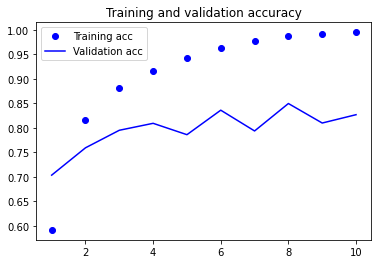

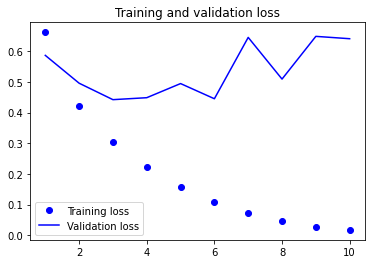

In [10]:
#繪製結果
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
#之前使用全連接方法(密集連接層)，測試準確度達到88%，與此相比這種小型循環神經網路表現不佳，驗證精準度僅達85%
#部分問題是僅使用輸入資料前500個文字，而不是完整序列資料，因此RNN較先前模型取得更少資訊
#另一問題為SimpleRNN不擅長處理長型序列資料，例如文字資料，因為SimpleRNN無法記憶太遠的資料